## Importar bibliotecas

In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Cargando los datos

In [24]:
# Cargar el conjunto de datos
lastfm_data = pd.read_csv("data/lastfm1.csv", sep=";")
lastfm_data

,user,artist
0,1,red hot chili peppers
1,1,the black dahlia murder
2,1,goldfrapp
3,1,dropkick murphys
4,1,le tigre
...,...,...
289948,19718,bob dylan
289949,19718,pixies
289950,19718,the clash
289951,19718,a tribe called quest


## Formato de transacción

In [25]:
transacciones = lastfm_data.groupby("user")["artist"].apply(list).reset_index()
transacciones["artist"] = transacciones["artist"].apply(lambda x: ','.join(x))
transacciones

,user,artist
0,1,"red hot chili peppers,the black dahlia murder,..."
1,3,"devendra banhart,boards of canada,cocorosie,ap..."
2,4,"tv on the radio,tool,kyuss,dj shadow,air,a tri..."
3,5,"dream theater,ac/dc,metallica,iron maiden,bob ..."
4,6,"lily allen,kanye west,sigur rós,pink floyd,ste..."
...,...,...
14995,19713,"armin van buuren,above & beyond,atb,ferry cors..."
14996,19714,"misfits,type o negative,arch enemy,red hot chi..."
14997,19715,"abba,james blunt,jason mraz,amy winehouse,quee..."
14998,19717,"marilyn manson,beyoncé,madonna,t.a.t.u.,katy p..."


## Graficar los artistas mas consumidos

In [26]:
import matplotlib.pyplot as plt

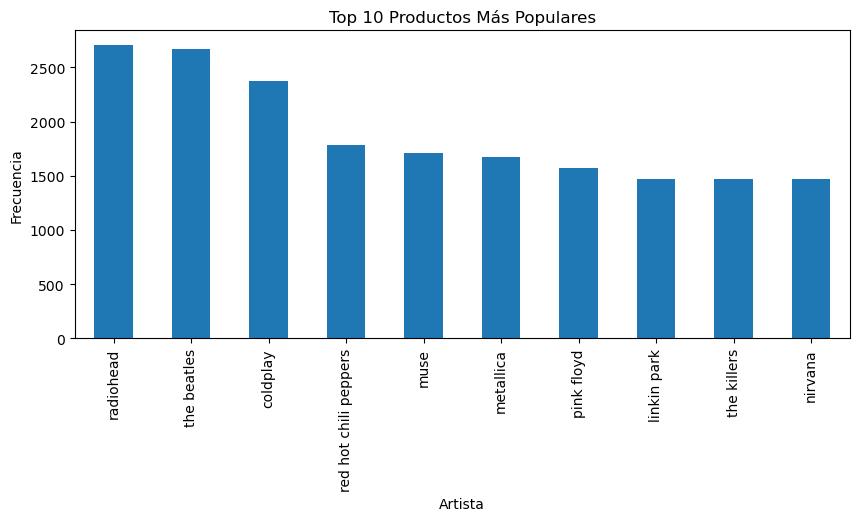

In [39]:
# Dividir las cadenas de productos y expandirlas en nuevas columnas
productos_divididos = transacciones['artist'].str.split(',', expand=True)

# Apilar las columnas para obtener una sola columna de productos
productos_apilados = productos_divididos.stack()

# Contar la frecuencia de cada producto
productos_contados = productos_apilados.value_counts()

# Mostrar los 10 productos más populares
plt.figure(figsize=(10, 4))

productos_contados.head(10).plot(kind='bar')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.title('Top 10 Productos Más Populares')
plt.show()

## Reglas de asociación por medio del algoritmo apriori

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [29]:
# Crear un codificador one-hot
te = TransactionEncoder()
transacciones_encoded = te.fit(transacciones["artist"].apply(lambda x: x.split(','))).transform(transacciones["artist"].apply(lambda x: x.split(',')))

In [30]:
transacciones_encoded_df = pd.DataFrame(transacciones_encoded, columns=te.columns_)
transacciones_encoded_df

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Obtenemos las reglas de asociación por medio del algoritmo apriori
frequent_artist = apriori(transacciones_encoded_df, min_support=0.02, use_colnames=True)
frequent_artist

,support,itemsets
0,0.022733,(2pac)
1,0.030933,(3 doors down)
2,0.032800,(30 seconds to mars)
3,0.021800,(50 cent)
4,0.036867,([unknown])
...,...,...
397,0.023400,"(the beatles, the doors)"
398,0.023467,"(the beatles, the killers)"
399,0.030467,"(the beatles, the rolling stones)"
400,0.025467,"(the beatles, the white stripes)"


In [32]:
# Generamos reglas de asociación
reglas = association_rules(frequent_artist, metric="confidence", min_threshold=0.2)
reglas = reglas.sort_values(by="confidence", ascending=False)
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
41,(snow patrol),(coldplay),0.050400,0.158533,0.026467,0.525132,3.312441,0.018477,1.772002,0.735160
12,(beck),(radiohead),0.057467,0.180267,0.029267,0.509281,2.825152,0.018907,1.670473,0.685426
65,(iron maiden),(metallica),0.059267,0.111333,0.029600,0.499438,4.485966,0.023002,1.775336,0.826039
21,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835,0.690046
...,...,...,...,...,...,...,...,...,...,...
74,(linkin park),(muse),0.098200,0.114067,0.020067,0.204345,1.791451,0.008865,1.113464,0.489902
114,(pink floyd),(queen),0.104933,0.077733,0.021400,0.203939,2.623572,0.013243,1.158538,0.691390
76,(red hot chili peppers),(linkin park),0.119067,0.098200,0.024067,0.202128,2.058326,0.012374,1.130256,0.583663
91,(metallica),(the beatles),0.111333,0.177867,0.022400,0.201198,1.131171,0.002598,1.029207,0.130488


In [33]:
# Verificamos si hay reglas redundantes
redundantes = reglas.duplicated(subset=['antecedents', 'consequents'])
print(redundantes)

26     False
41     False
12     False
65     False
21     False
       ...  
74     False
114    False
76     False
91     False
84     False
Length: 148, dtype: bool


In [34]:
reglas_podadas = reglas[~redundantes]
reglas_podadas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
41,(snow patrol),(coldplay),0.050400,0.158533,0.026467,0.525132,3.312441,0.018477,1.772002,0.735160
12,(beck),(radiohead),0.057467,0.180267,0.029267,0.509281,2.825152,0.018907,1.670473,0.685426
65,(iron maiden),(metallica),0.059267,0.111333,0.029600,0.499438,4.485966,0.023002,1.775336,0.826039
21,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835,0.690046
...,...,...,...,...,...,...,...,...,...,...
74,(linkin park),(muse),0.098200,0.114067,0.020067,0.204345,1.791451,0.008865,1.113464,0.489902
114,(pink floyd),(queen),0.104933,0.077733,0.021400,0.203939,2.623572,0.013243,1.158538,0.691390
76,(red hot chili peppers),(linkin park),0.119067,0.098200,0.024067,0.202128,2.058326,0.012374,1.130256,0.583663
91,(metallica),(the beatles),0.111333,0.177867,0.022400,0.201198,1.131171,0.002598,1.029207,0.130488


In [35]:
import networkx as nx

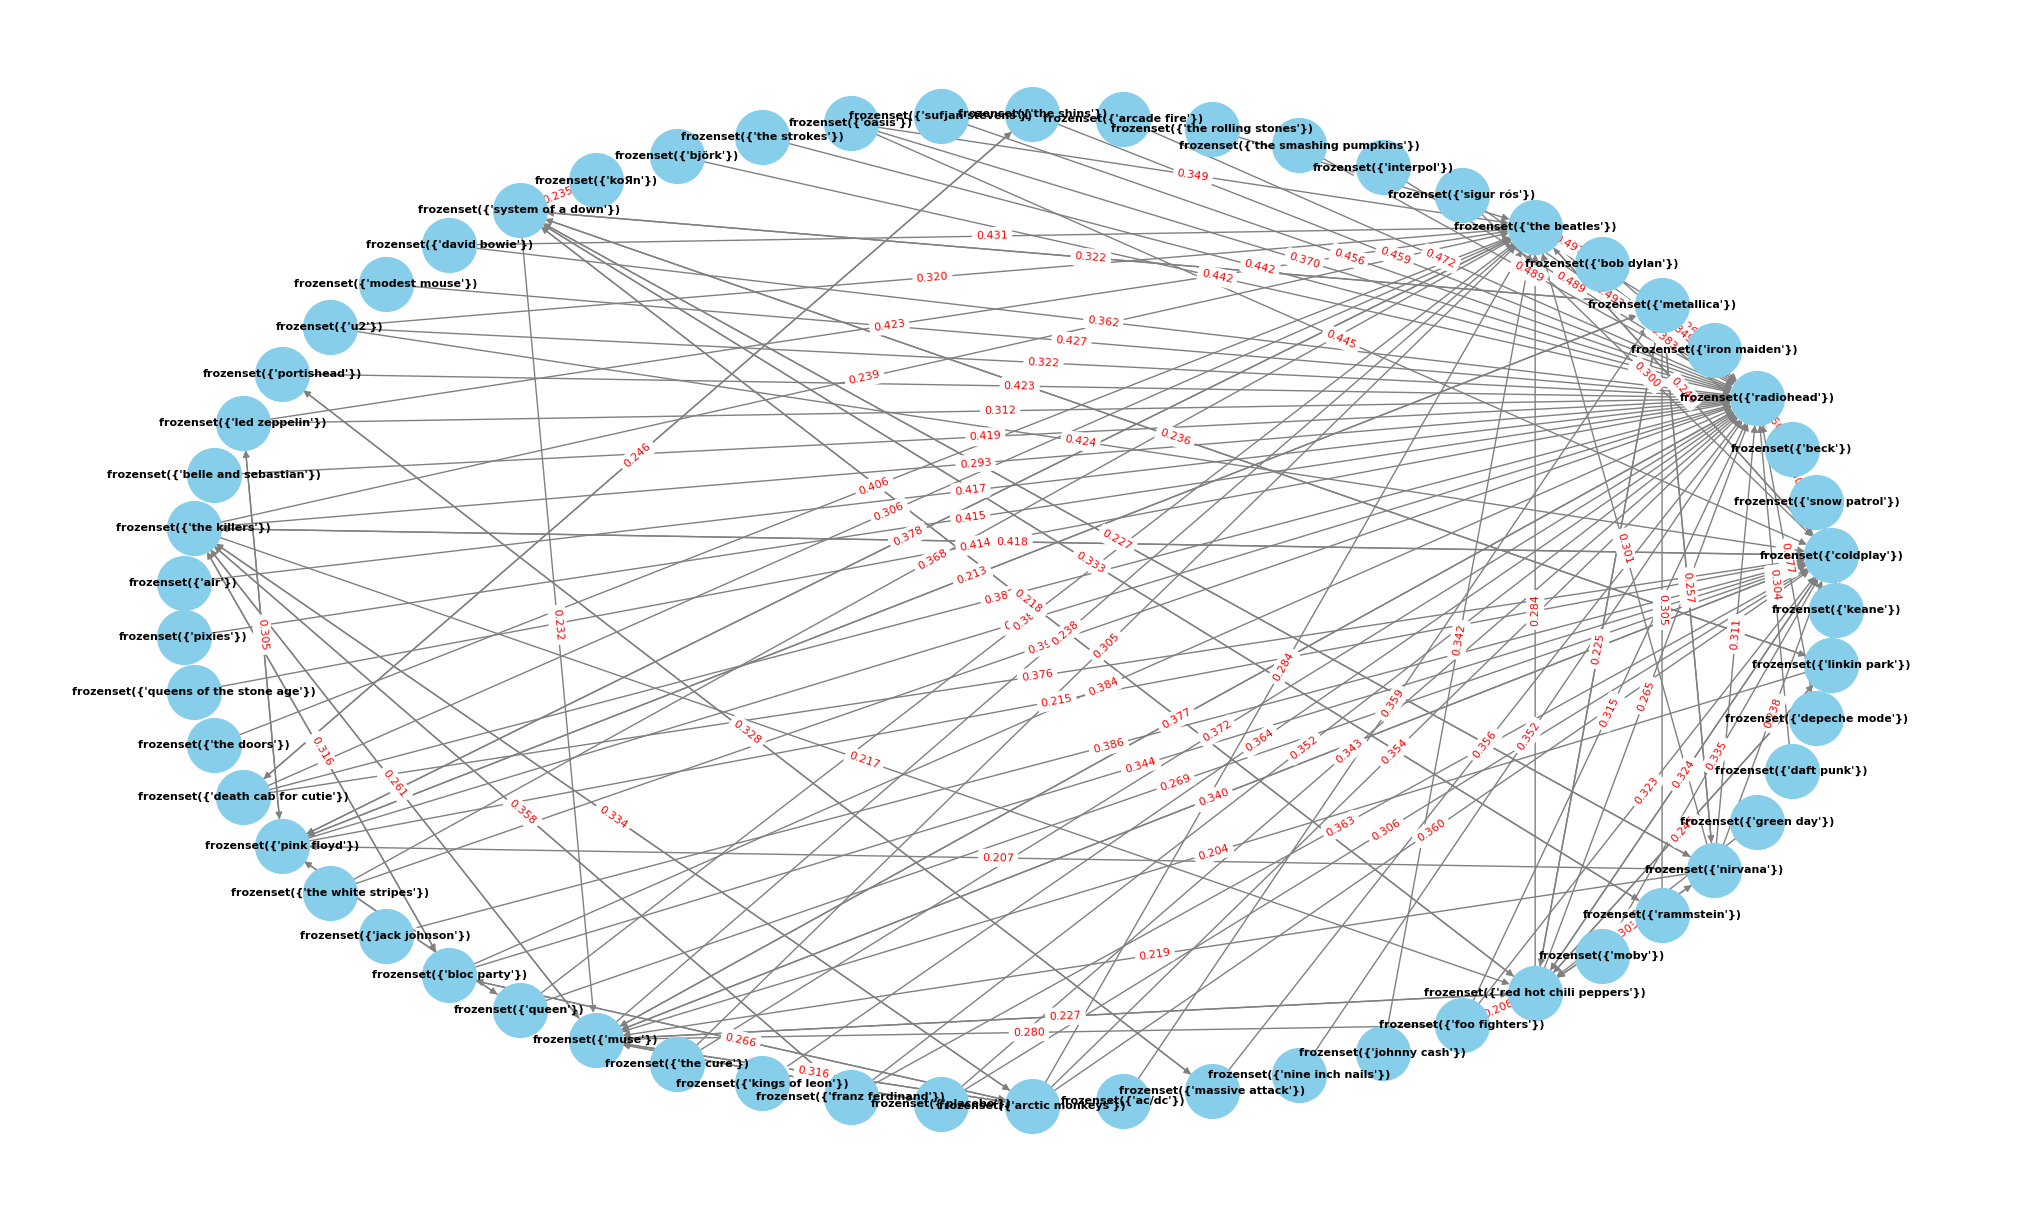

In [37]:
# Creamos un grafo con las reglas
G = nx.DiGraph()
for i, row in reglas.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])

# Visualizamos el grafo con layout circular
pos = nx.circular_layout(G)

# Redondeamos los valores de confianza a 3 decimales
edge_labels = {edge: f"{weight:.3f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}

plt.figure(figsize=(20, 12))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1500, node_color="skyblue", font_size=8, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.show()